# Yelp and Simple MLP

### Read in CSV

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

/home/kcozart/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
session_conf = tf.ConfigProto(
      intra_op_parallelism_threads=1,
      inter_op_parallelism_threads=1)
sess = tf.Session(config=session_conf)

In [3]:
df = pd.read_csv('binary2.csv')

In [4]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case = False)],axis = 1)
df.head(4)

,stars,name_of_month,day_of_week,user_average_stars,user_cool,user_funny,user_userful,user_num_reviews,user_num_friends,business_num_reviews,business_average_stars,business_catgry
0,-0.660753,0.223540,-0.333416,0.098172,-0.001040,-0.000746,-0.001261,-0.006663,-0.007403,-0.013611,-0.182665,-0.245179
1,0.339247,0.496267,-0.166749,-0.226828,-0.001040,-0.000746,-0.001257,-0.008252,-0.006670,-0.043918,-0.057665,-0.182679
2,-0.660753,-0.231006,-0.500082,-0.124328,-0.001017,-0.000534,-0.001101,0.001702,-0.007070,0.000251,0.067335,-0.245179
3,0.339247,-0.140097,-0.333416,0.028172,-0.000136,0.000021,-0.000185,0.041354,0.019539,0.006911,0.192335,-0.245179


### Split into Train and Test Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df.pop('stars')
X = df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.index,y,test_size=0.20)

In [8]:
print(X_train.shape)
print(X_test.shape)

(4209335,)
(1052334,)


In [9]:
print(y_train.shape)
print(y_test.shape)

(4209335,)
(1052334,)


In [10]:
# We need to get y sets to one-hot-encoded values
def create_one_hot_encoded_array(array):
    uniques, ids = np.unique(array, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train = create_one_hot_encoded_array(y_train)
y_test = create_one_hot_encoded_array(y_test)

print(y_train[:2])

[[0. 1.]
 [0. 1.]]


In [11]:
print(X_train[:2])

Int64Index([2314393, 4943771], dtype='int64')


In [12]:
X_train = X.iloc[X_train]

In [13]:
print(X_train[:2])

         name_of_month  day_of_week  user_average_stars  user_cool  \
2314393       0.223540     0.499918            0.253172  -0.001031   
4943771      -0.412824     0.166584           -0.086828  -0.000941   

         user_funny  user_userful  user_num_reviews  user_num_friends  \
2314393   -0.000741     -0.001190         -0.009507         -0.006403   
4943771   -0.000586     -0.000438          0.009148         -0.003469   

         business_num_reviews  business_average_stars  business_catgry  
2314393             -0.028425                0.067335        -0.245179  
4943771              0.010037                0.067335        -0.245179  


In [14]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [15]:
#X_train = X_train.values(columns=None)

In [16]:
print(X_train.shape)

(4209335, 11)


In [17]:
print(y_train.shape)

(4209335, 2)


In [18]:
X_test = X.iloc[X_test]

In [19]:
#X_test = X_test.values(columns=None)

In [20]:
print(X_test.shape)

(1052334, 11)


In [21]:
print(y_test.shape)

(1052334, 2)


### Define Network

In [22]:
model = Sequential()

In [23]:
model.add(Dense(100, input_shape=(11,)))

In [24]:
model.add(Activation('relu'))

In [25]:
model.add(Dropout(0.05))

In [26]:
model.add(Dense(100))

In [27]:
model.add(Activation('relu'))

In [28]:
model.add(Dropout(0.05))

In [29]:
model.add(Dense(50))

In [30]:
model.add(Activation('relu'))

In [31]:
model.add(Dropout(0.05))

In [32]:
model.add(Dense(2))

In [33]:
model.add(Activation('softmax'))

### Compile Network

In [34]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

### Fit Network

In [35]:
history = model.fit(X_train, y_train, 
          batch_size=50, epochs=10, verbose=1,
          validation_data=(X_test, y_test)
         )

Train on 4209335 samples, validate on 1052334 samples
Epoch 1/10
4209335/4209335 [==============================] - 240s 57us/step - loss: 0.4538 - acc: 0.7759 - val_loss: 0.4494 - val_acc: 0.7779
Epoch 2/10
4209335/4209335 [==============================] - 238s 57us/step - loss: 0.4521 - acc: 0.7762 - val_loss: 0.4490 - val_acc: 0.7779
Epoch 3/10
4209335/4209335 [==============================] - 237s 56us/step - loss: 0.4517 - acc: 0.7763 - val_loss: 0.4489 - val_acc: 0.7780
Epoch 4/10
4209335/4209335 [==============================] - 224s 53us/step - loss: 0.4515 - acc: 0.7764 - val_loss: 0.4487 - val_acc: 0.7780
Epoch 5/10
4209335/4209335 [==============================] - 252s 60us/step - loss: 0.4513 - acc: 0.7764 - val_loss: 0.4488 - val_acc: 0.7780
Epoch 6/10
4209335/4209335 [==============================] - 225s 54us/step - loss: 0.4512 - acc: 0.7765 - val_loss: 0.4486 - val_acc: 0.7779
Epoch 7/10
4209335/4209335 [==============================] - 231s 55us/step - loss: 0.4

In [36]:
# from sklearn.metrics import classification_report

# Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
# y_pred = model.predict_classes(X_test)
# print(classification_report(Y_test, y_pred))

# Y_train = np.argmax(y_train, axis=1) # Convert one-hot to index
# y_pred = model.predict_classes(X_train)
# print(classification_report(Y_train, y_pred))

In [37]:
np.unique(model.predict_classes(X_train))

array([0, 1])

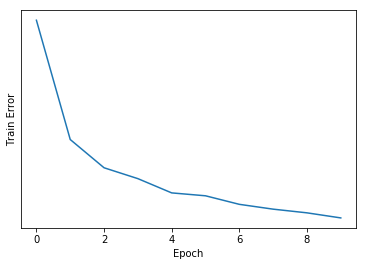

In [39]:
import matplotlib.pyplot as plt
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig('Yelp_Simple_MLP_V1')
plt.show()